In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm


In [2]:
df = pd.read_csv("HigherEducation_Dataset.csv")

In [3]:
###Know about the dataset


In [4]:
df.shape

(500, 9)

In [5]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [8]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [9]:
df.isna().sum()/df.count()*100

Serial No.           0.0
GRE Score            0.0
TOEFL Score          0.0
University Rating    0.0
SOP                  0.0
LOR                  0.0
CGPA                 0.0
Research             0.0
Chance of Admit      0.0
dtype: float64

In [10]:
###Checking of count values

In [11]:

    print(df.nunique(axis =0))

Serial No.           500
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64


In [12]:
###Univariant Analysis

C:\Users\Shreha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shreha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shreha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


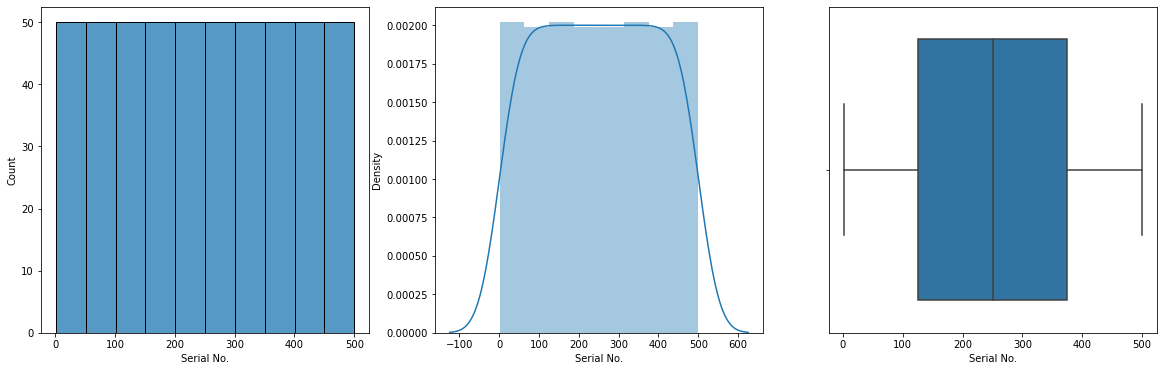

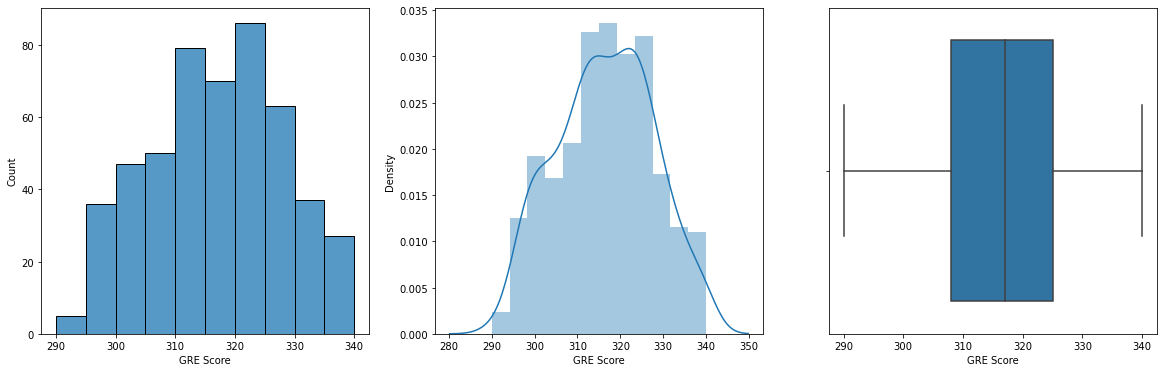

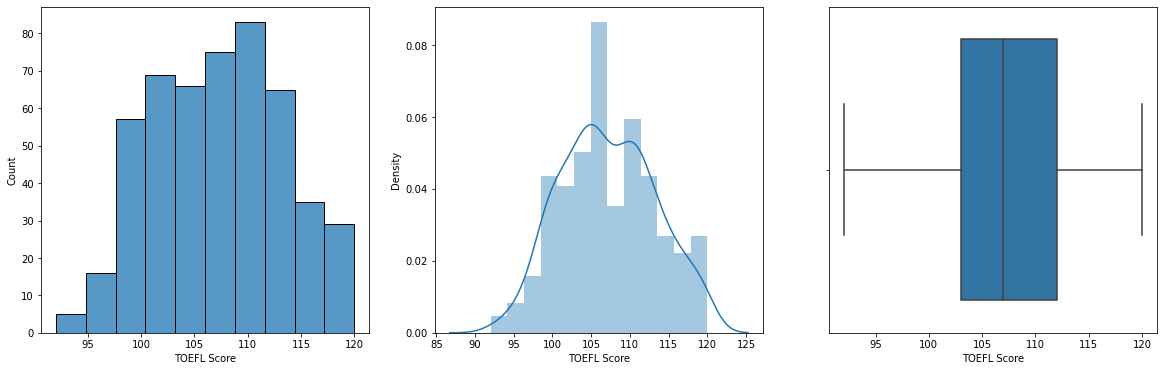

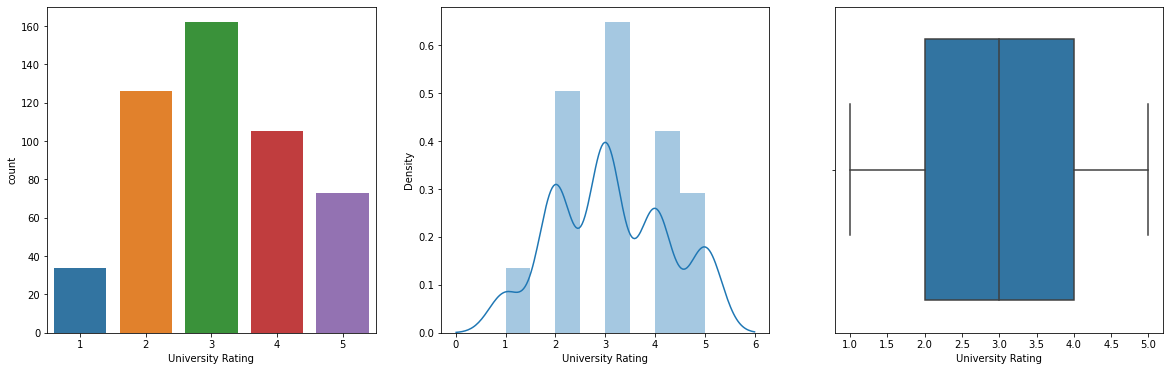

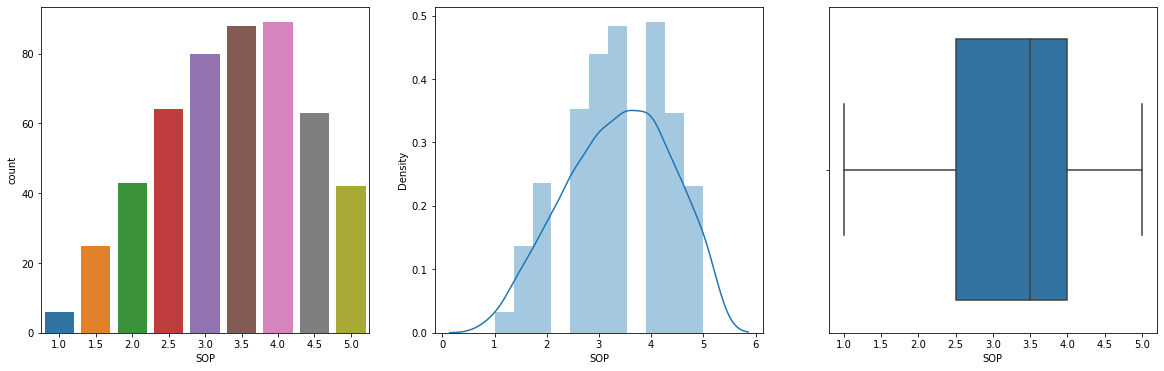

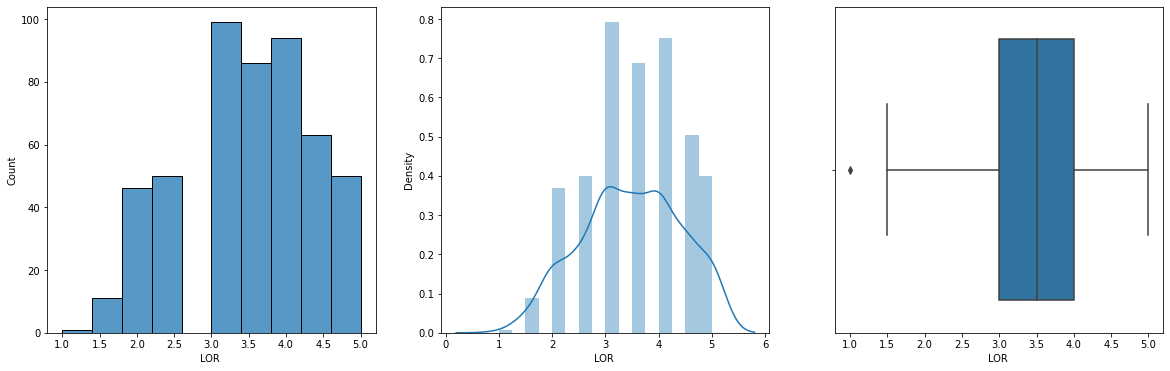

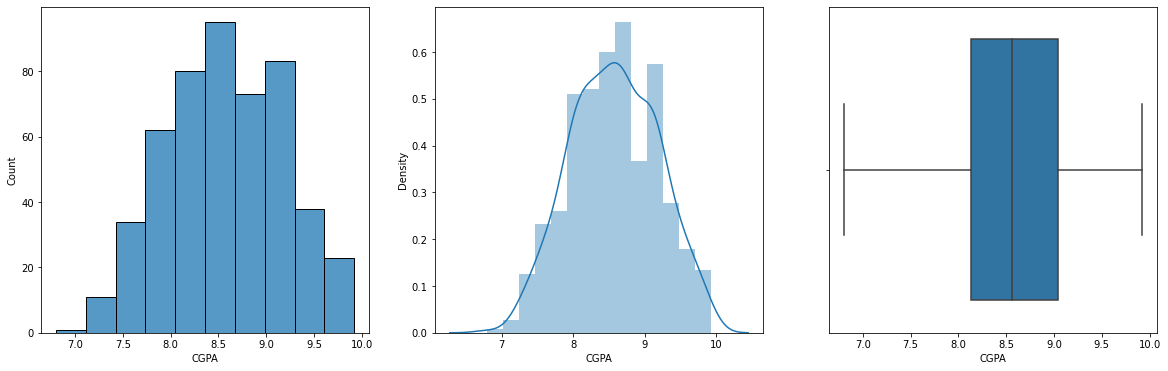

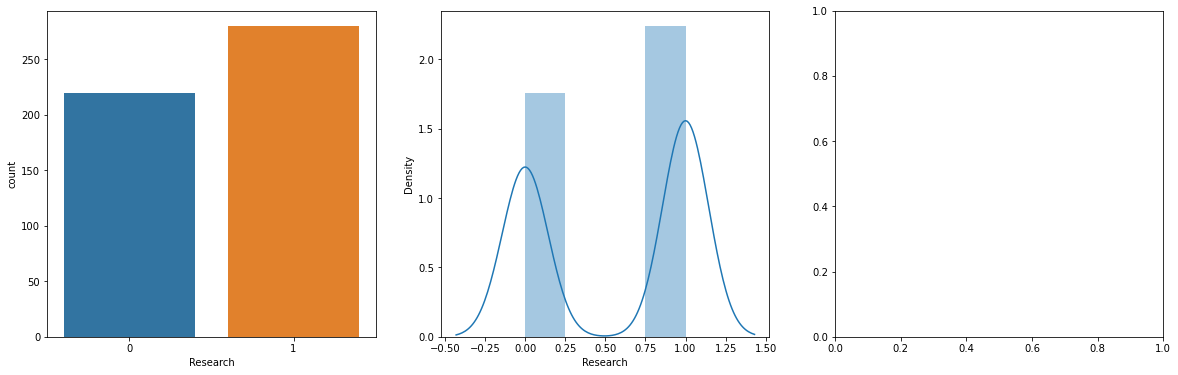

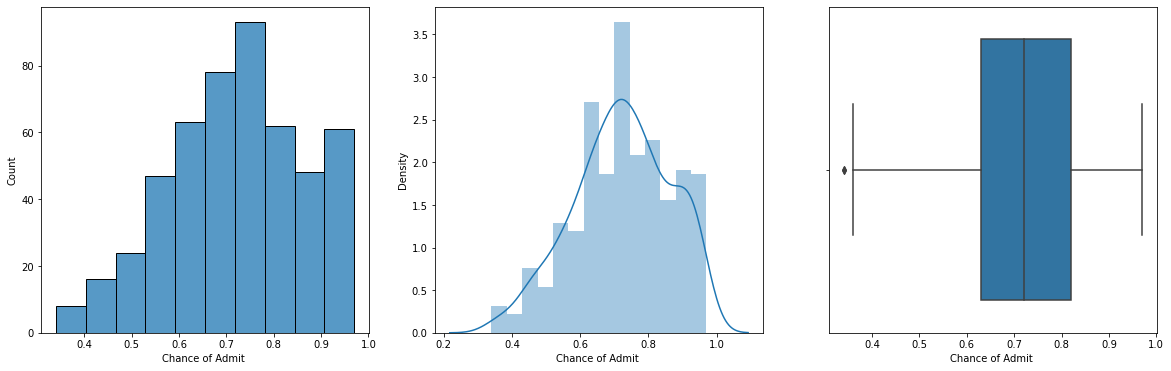

In [13]:
for col in df.columns:
    fig,axes = plt.subplots(1,3,figsize=(20,6))
    if(col == 'University Rating' or col =='SOP' or col =='LOP' or col =='Research'):
        sns.countplot(df[col],ax=axes[0])
    else:
        sns.histplot(df[col],bins=10,ax=axes[0])
    sns.distplot(df[col],ax=axes[1])
    if(col != 'Research'):
        sns.boxplot(df[col],ax=axes[2])
    

    

In [14]:

    print(df.skew(axis=0))

Serial No.           0.000000
GRE Score           -0.039842
TOEFL Score          0.095601
University Rating    0.090295
SOP                 -0.228972
LOR                 -0.145290
CGPA                -0.026613
Research            -0.242475
Chance of Admit     -0.289966
dtype: float64


In [15]:
###dropping the unique column of dataset

In [16]:
df.drop('Serial No.',axis=1,inplace = True)


In [17]:
###duplication of rows are checked
df.duplicated().sum()

0

In [18]:
###Checking for correlation between chance of admit and other feature

In [19]:
 df.corr()['Chance of Admit ']


GRE Score            0.810351
TOEFL Score          0.792228
University Rating    0.690132
SOP                  0.684137
LOR                  0.645365
CGPA                 0.882413
Research             0.545871
Chance of Admit      1.000000
Name: Chance of Admit , dtype: float64

In [20]:
###Observation
#Chance of admit column has very strong corelation with other columns

In [21]:
###Bivariant Analysis

In [22]:
cols=[]
cols=list(df.columns)

C:\Users\Shreha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shreha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shreha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shreha\ana

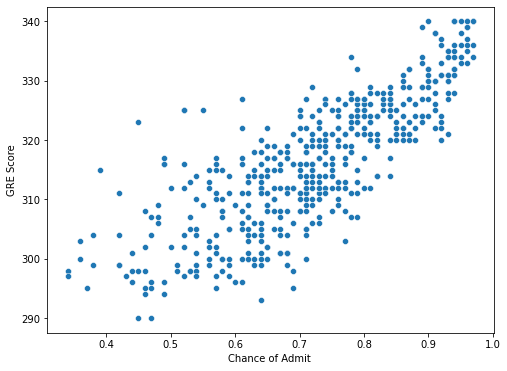

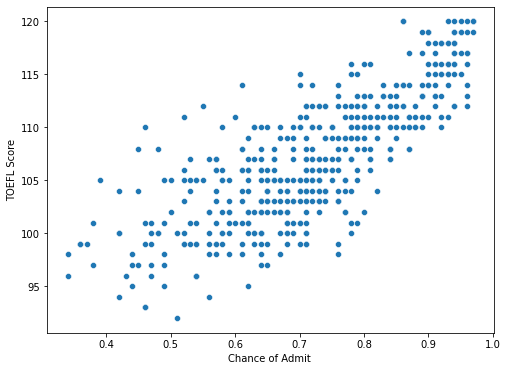

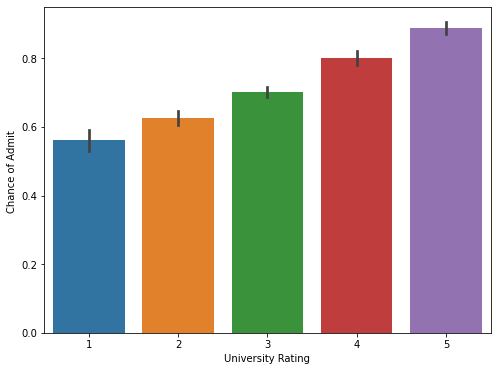

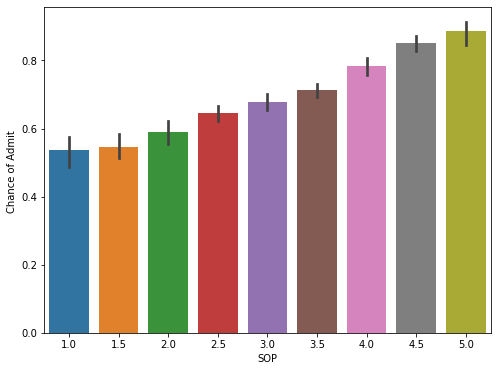

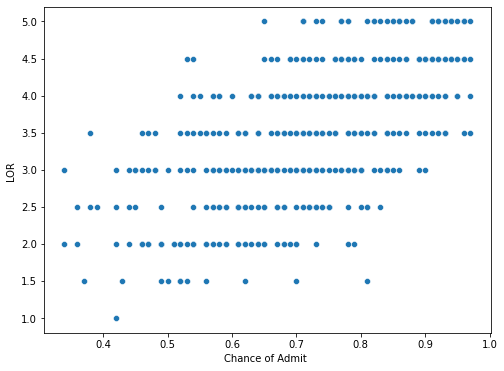

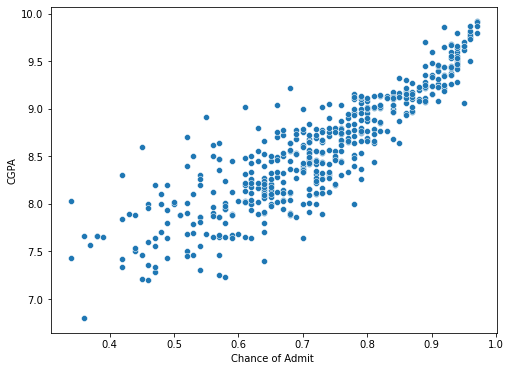

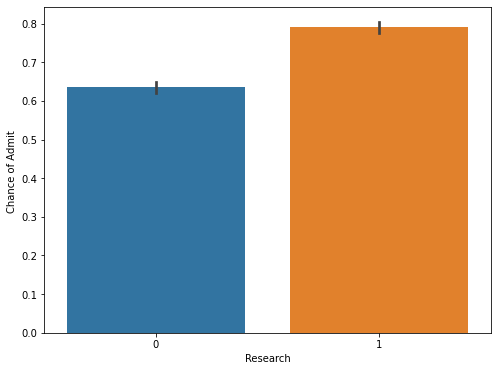

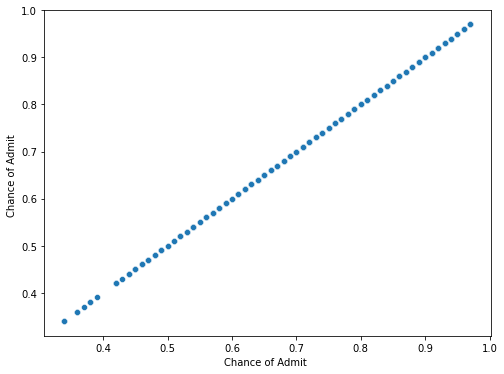

In [23]:
for col in cols:
    plt.subplots(1,1,figsize=(8,6))
    if(col == 'University Rating' or col =='SOP' or col =='LOR' or col =='Research'):
        sns.barplot(df[col],df['Chance of Admit '])
    else:
        sns.scatterplot(df['Chance of Admit '],df[col])

In [24]:
###Observations
#Chance of Admit linearly increases with GRE Score,ToFEL Score,CGPA Score
#Chance of Admit is more for university ratings 3/4/5
#With increase i value of LOR/SOP the chance of admit increases...its ore for value 4/4.5/5
#Chance of Admit is more for the more for the students who will go for reasearch

In [25]:
#CORRelation graphically

<AxesSubplot:>

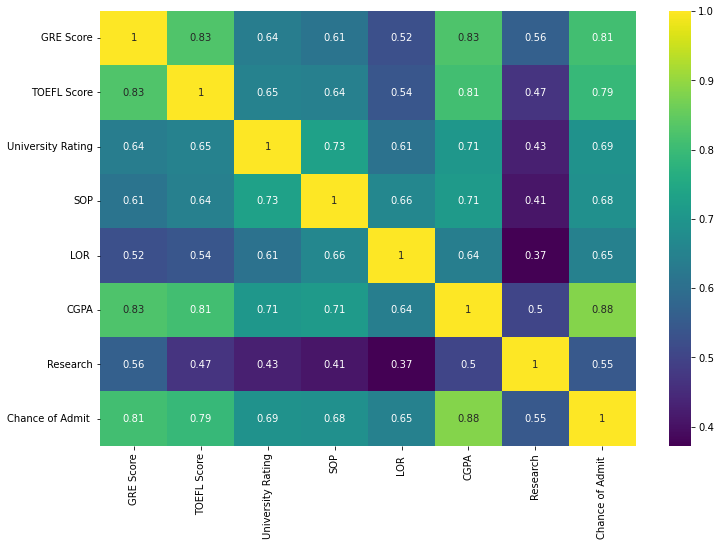

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

<Figure size 864x576 with 0 Axes>

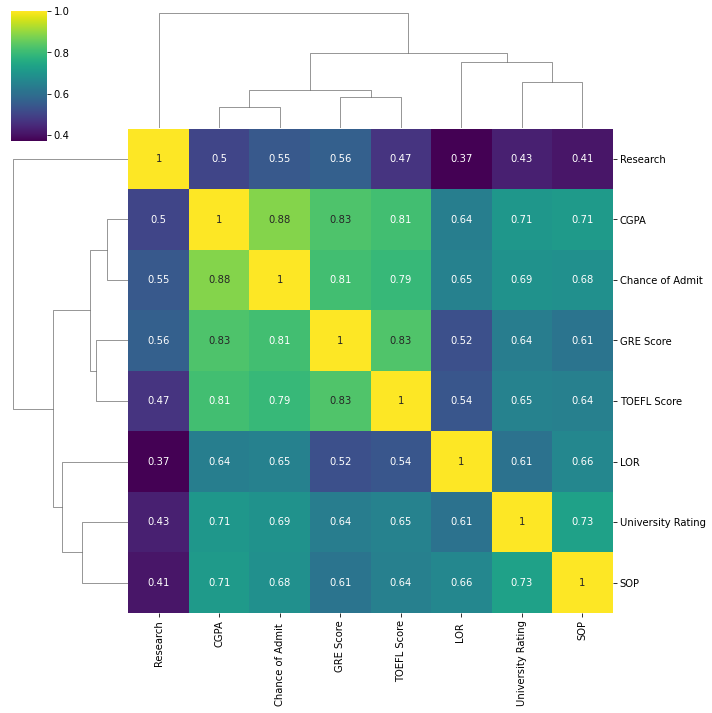

In [27]:
plt.figure(figsize=(12,8))
sns.clustermap(df.corr(),annot=True,cmap='viridis')

### Preprocessing of data

In [28]:
#NULL CHECK
df.isna().sum()/df.count()*100

GRE Score            0.0
TOEFL Score          0.0
University Rating    0.0
SOP                  0.0
LOR                  0.0
CGPA                 0.0
Research             0.0
Chance of Admit      0.0
dtype: float64

In [29]:
#DUPLICATE CHECK
df.duplicated().sum()
type(df.columns)

pandas.core.indexes.base.Index

In [30]:
#OUTLIER TREATMENT

#As we saw LOR and chance of admit column do have outliers
cols=['LOR ','Chance of Admit ']
Q1 = df[cols]. quantile(0.25)
Q3 = df[cols]. quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))). any(axis=1)]



C:\Users\Shreha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shreha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Chance of Admit '>

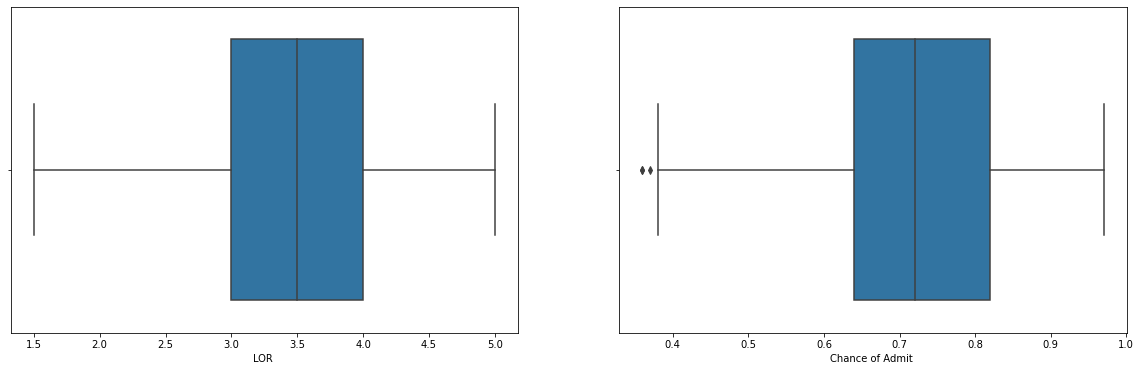

In [31]:
fig,axes = plt.subplots(1,2,figsize=(20,6))
sns.boxplot(df['LOR '],ax = axes[0])
sns.boxplot(df['Chance of Admit '],ax=axes[1])

In [32]:
Q1 = df['Chance of Admit ']. quantile(0.25)
Q3 = df['Chance of Admit ']. quantile(0.75)
IQR = Q3 - Q1
Q4=Q1- 1.5 * IQR

df = df[df['Chance of Admit '] >= Q1 - 1.5 * IQR]


C:\Users\Shreha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shreha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Chance of Admit '>

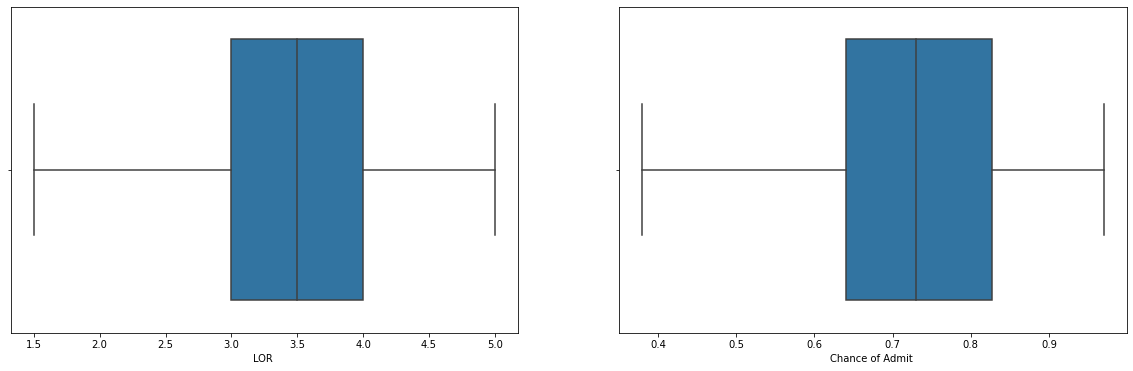

In [33]:
fig,axes = plt.subplots(1,2,figsize=(20,6))
sns.boxplot(df['LOR '],ax = axes[0])
sns.boxplot(df['Chance of Admit '],ax=axes[1])

In [34]:
#Feature engineering..not required


### Data Prep for Modeling using statmodel

In [35]:
X=df.drop('Chance of Admit ',axis = 1)
Y=df['Chance of Admit ']


In [36]:
X.head()
Y.head()
X.shape

(494, 7)

In [37]:


X_1=sm.add_constant(X)
rm_1=sm.OLS(Y,X_1).fit()
print(rm_1.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     316.6
Date:                Sat, 16 Apr 2022   Prob (F-statistic):          1.51e-176
Time:                        23:27:39   Log-Likelihood:                 707.68
No. Observations:                 494   AIC:                            -1399.
Df Residuals:                     486   BIC:                            -1366.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2095      0.10

C:\Users\Shreha\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Linear regression suing sklearn

In [38]:
#standarize the input X before putting to model

In [39]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [40]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_scaled,Y)

LinearRegression()

In [41]:
col=list(X.columns)
coef = lr.coef_
for i in range(len(col)):
    print("Coefficient of "+col[i]+" is "+str(coef[i]))
print()
print("Intercept is "+str(lr.intercept_))

Coefficient of GRE Score is 0.019788581991181758
Coefficient of TOEFL Score is 0.015789830736672866
Coefficient of University Rating is 0.006617867937457094
Coefficient of SOP is 0.004087045167019587
Coefficient of LOR  is 0.013933387512689719
Coefficient of CGPA is 0.06870602426062737
Coefficient of Research is 0.012013752709850882

Intercept is 0.7260728744939269


In [42]:
print("R2 Score : ",lr.score(X_scaled,Y))
print("Adjusted R-squared : ", 1 - (1-lr.score(X_scaled, Y))*(len(Y)-1)/(len(Y)-X_scaled.shape[1]-1))

R2 Score :  0.8201486714213262
Adjusted R-squared :  0.8175582201866539


### CHECK OF ALL ASSUMPTIONS taken during LINEAR REGRESSION MODEL

In [43]:
#1.VIF Score tells the collinearity

for i in X.columns:
    X[i] = StandardScaler().fit_transform(X[[i]])
print(X)

     GRE Score  TOEFL Score  University Rating       SOP      LOR       CGPA  \
0     1.817473     1.777640           0.765090  1.131346  1.093452  1.784785   
1     0.654247    -0.051501           0.765090  0.623730  1.093452  0.471628   
2    -0.061585    -0.550358          -0.115923 -0.391501 -0.002218 -0.993047   
3     0.475289     0.447355          -0.115923  0.116115 -1.097888  0.134921   
4    -0.240543    -0.716644          -0.996936 -1.406733 -0.550053 -0.639504   
..         ...          ...                ...       ...       ...       ...   
495   1.370079     0.114784           1.646103  1.131346  0.545617  0.724158   
496   1.817473     1.611354           1.646103  1.638962  1.641286  2.155162   
497   1.191121     2.110211           1.646103  1.131346  1.641286  1.633267   
498  -0.419501    -0.716644           0.765090  0.623730  1.641286 -0.269127   
499   0.922684     0.946212           0.765090  1.131346  1.093452  0.757829   

     Research  
0    0.877844  
1    0.

### PASS A STANDARIZED VALUE FOR VIF CHECK

In [44]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
5,CGPA,4.69
0,GRE Score,4.35
1,TOEFL Score,3.81
3,SOP,2.86
2,University Rating,2.59
4,LOR,1.98
6,Research,1.49


In [45]:
#As all the feature are VIF score less than 5, we can say there is no high colinearity between columns of X

In [46]:
#As we have checked already in bivariant analysis that the target variable i.e the chance of admit holds linear relationship with the other input features

### TEST FOR HOMOSCEDASTICITY

In [47]:
#HOMOSCEDASTICITY means the residuals have wqual or almost equal variance  across the regression line

In [48]:
Y_pred = lr.predict(X)
print(type(Y_pred))
residuals = Y.values-Y_pred    #Y is a series and Y.values is a numpy array

<class 'numpy.ndarray'>


In [49]:
res_df = pd.DataFrame()
res_df['Y Actual']=list(Y)
res_df['Y pred']= list(Y_pred)
res_df['residual']= residuals
res_df.head()
print(Y_pred.min())
print(Y_pred.max())

0.4345415841550332
0.9946685647238608


C:\Users\Shreha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shreha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


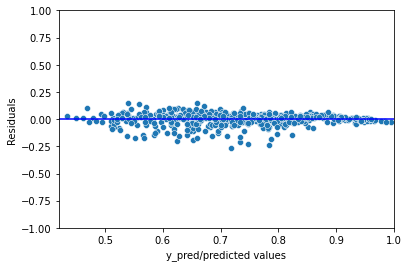

In [50]:
sns.scatterplot(Y_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-1,1)
plt.xlim(0.42,1.00)
p = sns.lineplot([0.37,1.05],[0,0],color='blue')



In [51]:
#Check for multivariate normality

C:\Users\Shreha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-1.2031051416980574


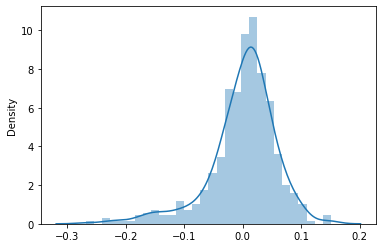

In [52]:
sns.distplot(residuals)
print(res_df['residual'].skew())

In [53]:
#OBSERVATIONS : the residuals are left skewed


In [54]:
### CHECK FOR AUTO CORRELATION OF RESIDUALS

<AxesSubplot:ylabel='residual'>

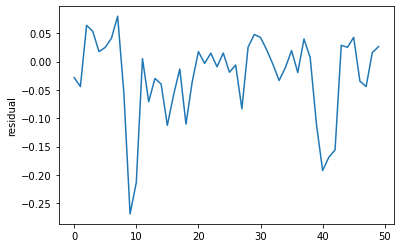

In [55]:
x_val=list(range(0,50))
sns.lineplot(x=x_val,y=res_df['residual'][0:50])

In [56]:
#from statsmodels.graphics.tsaplots import plot_acf
#plot_acf(res_df['residual'])

In [57]:
###METRICS CALCULATIONS FOR THE performance of model.....MAE, MSE, RMSE, MAPE, RSuare,Adjust RSquare

In [58]:

from sklearn.metrics import mean_absolute_error, mean_squared_error
print("Mean absolute error:", mean_absolute_error(Y_pred,Y))
print("Mean Squared error:", mean_squared_error(Y_pred,Y))
print("Root Mean squared error:", np.sqrt(mean_squared_error(Y_pred,Y)))
#print("Mean absolute Percentage error:",mean_absolute_percentage_error(Y_pred,Y))
print()
print("R-squared:",lr.score(X,Y)*100)
print("Adjusted R-squared:", 1 - (1-lr.score(X, Y))*(len(Y)-1)/(len(Y)-X.shape[1]-1))

Mean absolute error: 0.04122559564471423
Mean Squared error: 0.003336053329097497
Root Mean squared error: 0.0577585779698349

R-squared: 82.01486714213262
Adjusted R-squared: 0.8175582201866539


### TestTrain split of DataSet

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [60]:
print("Traning set shape X:", x_train.shape)
print("Test set shape X:", x_test.shape)
print("Traning set shape Y:", y_train.shape)
print("Test set shape Y:", y_test.shape)

Traning set shape X: (395, 7)
Test set shape X: (99, 7)
Traning set shape Y: (395,)
Test set shape Y: (99,)


In [61]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [62]:
col=list(X.columns)
coef = lr.coef_
for i in range(len(col)):
    print("Coefficient of "+col[i]+" is "+str(coef[i]))
print()
print("Intercept is "+str(lr.intercept_))

Coefficient of GRE Score is 0.018976719179117474
Coefficient of TOEFL Score is 0.014653402174975037
Coefficient of University Rating is 0.007567448466101731
Coefficient of SOP is 0.005347692245031574
Coefficient of LOR  is 0.013156000142439983
Coefficient of CGPA is 0.07049156646117401
Coefficient of Research is 0.011107996322277162

Intercept is 0.725579375758431


Mean of Errors 0.00246


C:\Users\Shreha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


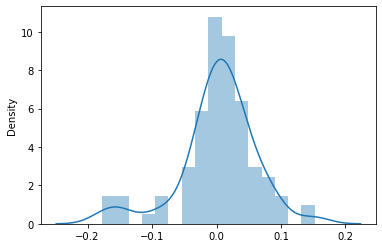

In [63]:
y_pred=lr.predict(x_test)
error = y_test.values-y_pred
sns.distplot(error)
print("Mean of Errors {}".format(round(np.mean(error),5)))


In [64]:
print("Mean absolute error:", mean_absolute_error(y_pred,y_test))
print("Mean Squared error:", mean_squared_error(y_pred,y_test))
print("Root Mean squared error:", np.sqrt(mean_squared_error(y_pred,y_test)))
#print("Mean absolute Percentage error:",mean_absolute_percentage_error(Y_pred,Y))
print()
print("R-squared:",lr.score(x_test,y_test)*100)
print("Adjusted R-squared:", 1 - (1-lr.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))

Mean absolute error: 0.04108491647500795
Mean Squared error: 0.0035020906119297077
Root Mean squared error: 0.059178464088971656

R-squared: 80.30094381054198
Adjusted R-squared: 0.7878563179596829


### Comments on the performance measures and if there is any need to improve the model or not

##### RMSE is a popular formula to measure the error rate of a regression model
##### There is chance of 5 percent of error rate in predecting the chance of admit by the above designed predictor model
##### All other metrics have significant small error rate
##### R-squared and Adjusted R-squared are good and pretty close
##### We have built a model with Adjusted R-squared value of 0.787 which is good 


### Comments on significance of predictor variables
##### GRE,TOFEL scores and CGPA are more significant columns in predicting Chance of Admit
##### Rest other columns such as SOP,LOR,University rating are less significant columns in predicting Chance of Admit